In [17]:
####################### importing libraries #########################

import numpy as np 
import os 
import shutil 
from glob import glob
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt 

import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

from sklearn.model_selection import train_test_split



In [18]:
########## device agnostic #########

device = "cuda" if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [9]:
######################### Loading Data ######################

train_dir = './data/training_set/'
test_dir = './data/test_set/'

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

def create_directories():
    try:
        if Path(train_cat_dir).is_dir() and Path(train_dog_dir).is_dir():
            print('dir already exist')
        else:
            os.makedirs(train_cat_dir,exist_ok= True)
            os.makedirs(train_dog_dir, exist_ok = True)
            
    except:
       pass


def move_to_respective_directories(
    source_folder, 
    destination_folder, 
    keyword
    ):
    for image_file_path in glob(os.path.join(source_folder, '**')):
        try:
            image_file_name = os.path.basename(image_file_path)
            if keyword in image_file_name:
                shutil.move(
                    os.path.join(source_folder, image_file_name), 
                    os.path.join(destination_folder, image_file_name)
                    )
        except Exception as e:
            print(e)


create_directories()

move_to_respective_directories(train_dir, train_cat_dir, 'cats')
move_to_respective_directories(train_dir, train_dog_dir, 'dogs')



dir already exist
Cannot move a directory './data/training_set/cats' into itself './data/training_set/cats\cats'.
Cannot move a directory './data/training_set/dogs' into itself './data/training_set/dogs\dogs'.


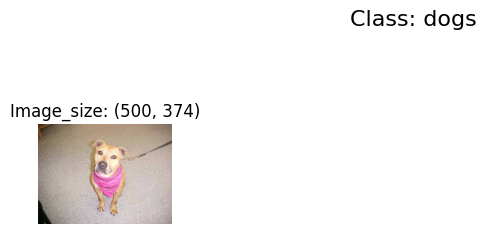

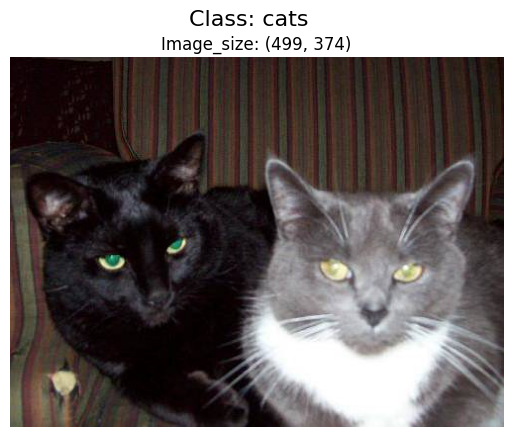

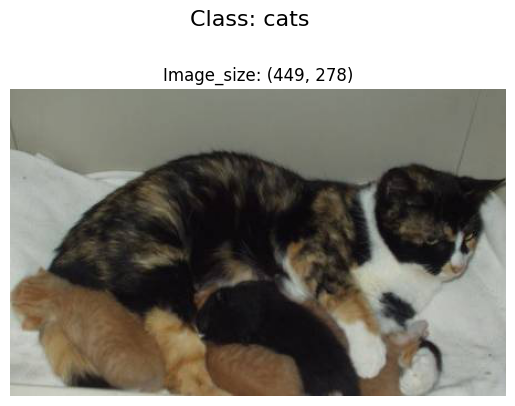

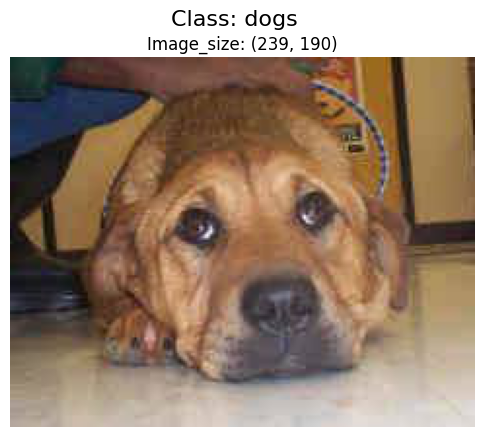

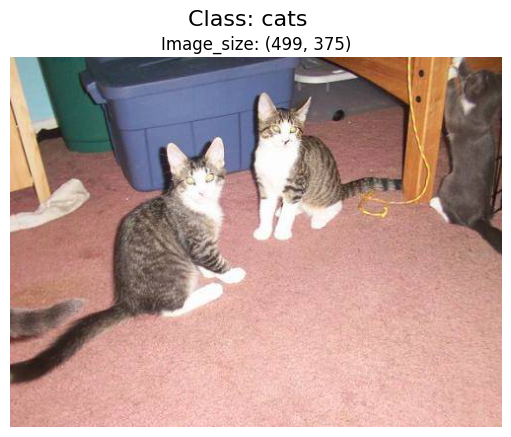

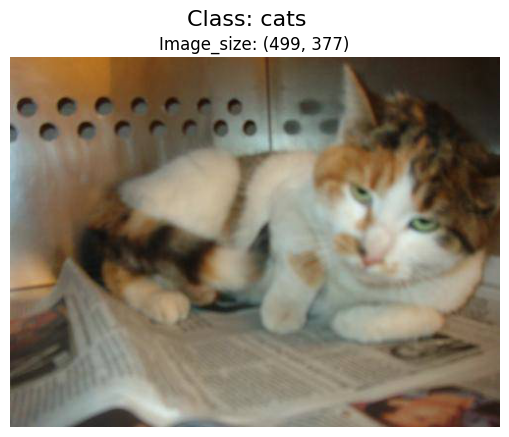

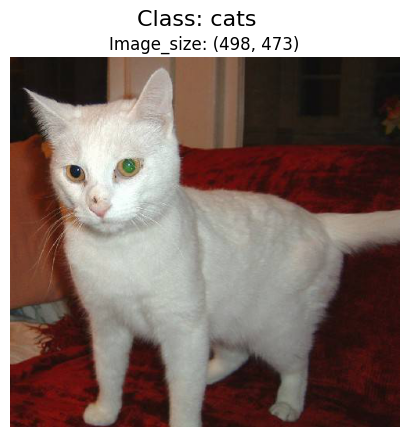

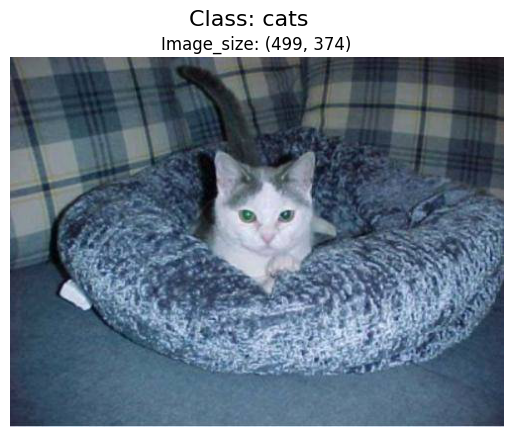

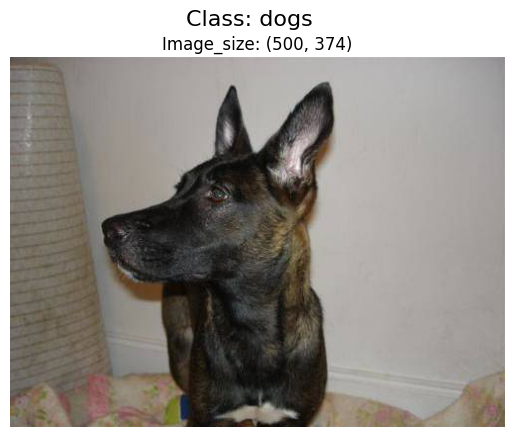

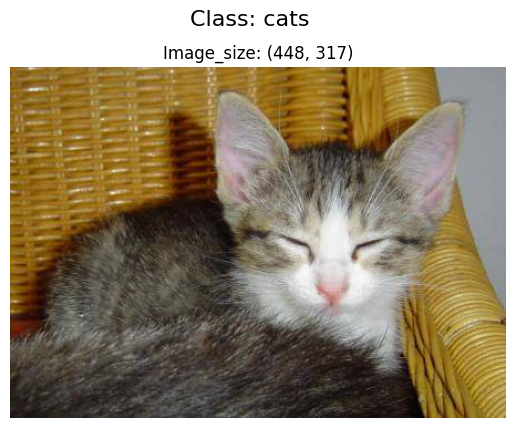

In [16]:
########## visualize the sample data ###########
import random 

random.seed(42)
image_path_list = list(Path(train_dir).glob("*/*.jpg"))

random_img_path = random.sample(image_path_list, k =10)

fig = plt.figure(figsize=(10,6))
for idx in range(len(random_img_path)):
    with Image.open(random_img_path[idx]) as f:
        class_name = random_img_path[idx].parent.stem
        fig.add_subplot(2,5,idx+1)
        plt.imshow(f)
        plt.title(f"Image_size: {f.size}")
        plt.axis('off')
        plt.suptitle(f"Class: {class_name}", fontsize = 16)
        plt.show()


In [19]:
########## split train and validate data #############
dataset = ImageFolder(train_dir)

train_data, val_data, train_label, val_label = train_test_split(dataset.imgs,
                                                                dataset.targets,
                                                                test_size=0.2,
                                                                random_state= 42)

In [ ]:
from torchvision.transforms import v2

# Augment the train data 
train_transform = v2.Compose([
    v2.Resize((64, 64)),
    v2.RandomHorizontalFlip(p = 0.5),
    v2.ToTensor()
])

# Not augment the test data
test_transform = v2.Compose([
    v2.Resize((64,64)),
    v2.ToTensor()
])